In [1]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Data Science  ML/Icaro 23/tp1/argentina_cars.csv')

In [5]:
#df= pd.read_csv('/content/drive/MyDrive/Curso_icaros/Tp1/argentina_cars.csv')

# ***Venta de autos en Argentina***
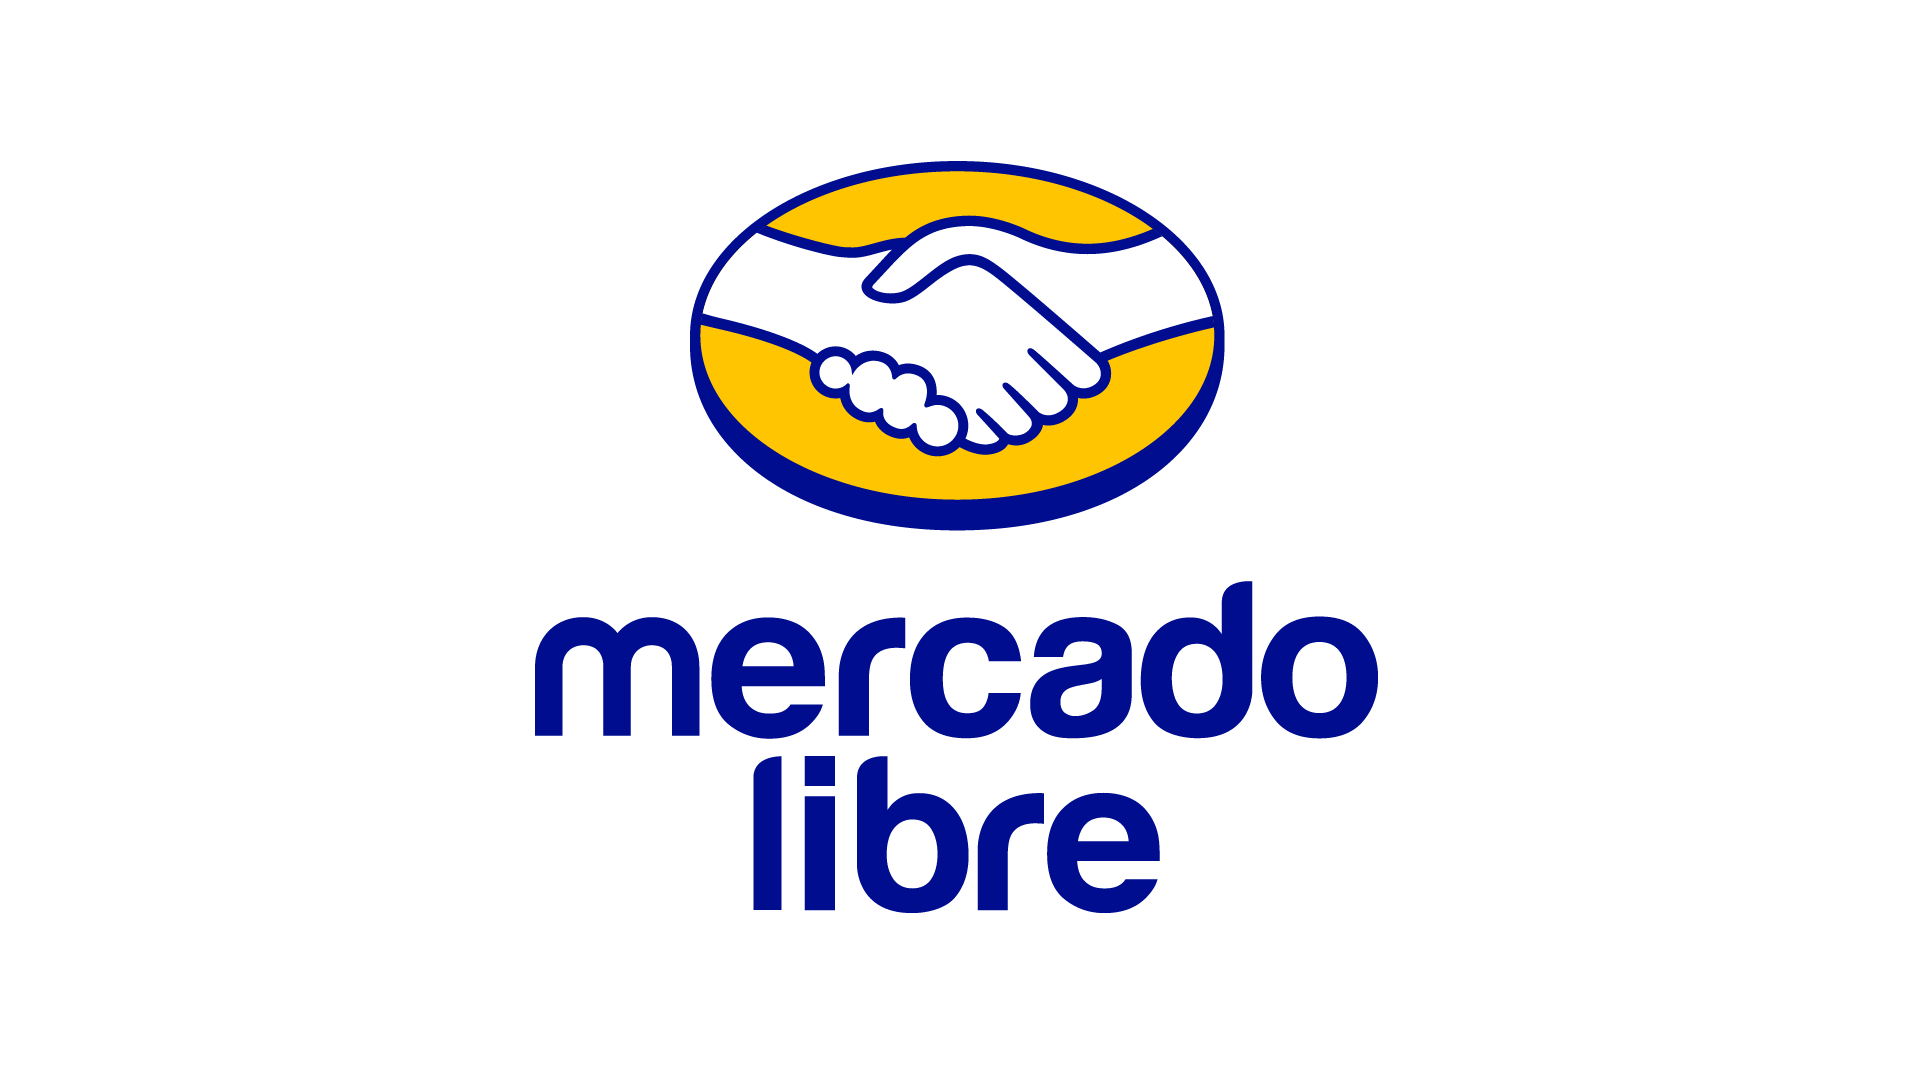

**Trabajo practico n°1 **
 Data Science Icaro
- *Integrantes*: Marina Grabelli, Jeremias Pigini, Patricia Gonzalez

**Fuente:**
 https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices

-Dataset generado por webscrapping de Mercadolibre

-Datos correspondientes a enero 2023 Argentina. 


# Analisis exploratorio de datos

In [6]:
df.head(), df.tail()

(      money    brand          model  year        color fuel_type  door  \
 0  10350000   Toyota  Corolla Cross  2022     Plateado     Nafta   5.0   
 1  10850000     Jeep        Compass  2022       Blanco     Nafta   5.0   
 2     35500     Jeep        Compass  2022  Gris oscuro     Nafta   5.0   
 3     19000  Citroën      C4 Cactus  2022  Gris oscuro     Nafta   5.0   
 4   5800000   Toyota        Corolla  2019         Gris     Nafta   4.0   
 
          gear motor body_type  kilometres currency  
 0  Automática   NaN       SUV         500    pesos  
 1  Automática   2.4       SUV         500    pesos  
 2  Automática   2.4       SUV         500  dólares  
 3  Automática   NaN       SUV         550  dólares  
 4      Manual   1.8     Sedán        9000    pesos  ,
        money       brand    model  year   color fuel_type  door        gear  \
 505  5250000   Chevrolet  Tracker  2018    Gris     Nafta   5.0  Automática   
 506    46000  Volkswagen   Amarok  2019    Gris    Diésel   4.

In [7]:
#Dimensiones dataset
df.shape

(510, 12)

In [8]:
#Nombre de columnas
df.columns

Index(['money', 'brand', 'model', 'year', 'color', 'fuel_type', 'door', 'gear',
       'motor', 'body_type', 'kilometres', 'currency'],
      dtype='object')

In [9]:
#Cambio de nombre columna
df.rename(columns={"money": "price"},inplace = True)

In [10]:
df.head()

,price,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


**Variables categoricas**


*   brand

*   model
*   gear


*   fuel_type




*   gear
*   currency



**Variables numericas**


*   price
*   kilometres


*   door
*   year


*   motor








In [11]:
df_categoricas= df[['brand', 'model', 'color', 'fuel_type', 'gear',
        'body_type', 'currency']]
df_numericas= df[['price','kilometres','door','year','motor']]

# **Limpieza de datos**

In [12]:
#Se discriminan publicaciones en dolares por ser las menos significativas
df.currency.value_counts()

pesos      427
dólares     83
Name: currency, dtype: int64

In [13]:
df_pesos=df[df['currency'] == 'pesos']



In [14]:
df_pesos.dtypes

price           int64
brand          object
model          object
year            int64
color          object
fuel_type      object
door          float64
gear           object
motor          object
body_type      object
kilometres      int64
currency       object
dtype: object

**Se modifican valores inconsistentes o incompletos**   

In [15]:
#se remplaza dato tipo float por int
df_pesos['door'] = df_pesos['door'].astype(int)
df_pesos['door']

<ipython-input-15-24acaaa2b22e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['door'] = df_pesos['door'].astype(int)


0      5
1      5
4      4
9      5
12     5
      ..
503    5
504    5
505    5
507    5
509    5
Name: door, Length: 427, dtype: int64

In [16]:
df_pesos.motor.value_counts()

1.6              152
2.0               60
1.4               50
1.8               43
1.5               39
2.4               14
1.2               12
2.8               10
1.0                9
2.5                6
3.2                5
1.3                4
2.3                3
2                  3
3.6                3
2.2                2
2.1                2
3.0                2
1.6 MSI Nafta      1
5.7                1
Name: motor, dtype: int64

In [17]:
#remplazar motores con numeracion alfanumerica y valores   menores a 1 por 1(son los valores de los que hay solo una unidad) 
df_pesos['motor'].replace(['TURBO','1.6 MSI Nafta','TOYOTA 2.8','2.8tdi 223cv','4.4','3.0 TD'], [1,1,1,1,1,1],inplace=True)


<ipython-input-17-2874b6f9e048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['motor'].replace(['TURBO','1.6 MSI Nafta','TOYOTA 2.8','2.8tdi 223cv','4.4','3.0 TD'], [1,1,1,1,1,1],inplace=True)


In [18]:
df_pesos['motor'].head(15)

0     NaN
1     2.4
4     1.8
9       1
12    NaN
13    1.6
15    1.6
17    1.5
18    1.2
19    2.4
20    1.5
22    1.8
23    2.8
24    NaN
25    1.5
Name: motor, dtype: object

**Manejo de dato nulos en el dataset**

In [19]:
#valores faltantes en el dataset
df_pesos.isna().sum()

price          0
brand          0
model          0
year           0
color         10
fuel_type      0
door           0
gear           0
motor          6
body_type      1
kilometres     0
currency       0
dtype: int64

In [20]:
#remplazar nan values por 0
df_pesos['motor'].fillna(0, inplace=True)
print(df_pesos['motor'])

0        0
1      2.4
4      1.8
9        1
12       0
      ... 
503    2.4
504    1.8
505    1.8
507    1.6
509    1.5
Name: motor, Length: 427, dtype: object


<ipython-input-20-12171b7e9f99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['motor'].fillna(0, inplace=True)


In [21]:
#remplazar nan values por  color mas publicado
df_pesos['color'].fillna('plateado', inplace=True)
print(df_pesos['color'])

0      Plateado
1        Blanco
4          Gris
9       Naranja
12     Plateado
         ...   
503        Gris
504        Gris
505        Gris
507      Blanco
509        Gris
Name: color, Length: 427, dtype: object


<ipython-input-21-3eeddfccecbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['color'].fillna('plateado', inplace=True)


In [22]:
df_pesos['motor'].fillna(1, inplace=True)
print(df_pesos['motor'])

0        0
1      2.4
4      1.8
9        1
12       0
      ... 
503    2.4
504    1.8
505    1.8
507    1.6
509    1.5
Name: motor, Length: 427, dtype: object


<ipython-input-22-8ea2fbfabe11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['motor'].fillna(1, inplace=True)


In [23]:
#se remplaza valor nulo por el valor mas representado en 'gear'
df_pesos['gear'].fillna(value='Manual', inplace=True)
df_pesos['gear'].value_counts()

<ipython-input-23-facbde288ba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['gear'].fillna(value='Manual', inplace=True)


Manual        280
Automática    147
Name: gear, dtype: int64

In [24]:
df_pesos['body_type'].fillna(value='varios', inplace=True)
df_pesos['body_type'].value_counts()

<ipython-input-24-330f03688fb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['body_type'].fillna(value='varios', inplace=True)


Hatchback      165
SUV            106
Sedán           85
Pick-Up         40
Monovolumen     17
Furgón           8
Rural            2
Crossover        1
varios           1
Coupé            1
Minivan          1
Name: body_type, dtype: int64

In [25]:
#valores faltantes en el dataset
df_pesos.isna().sum()

price         0
brand         0
model         0
year          0
color         0
fuel_type     0
door          0
gear          0
motor         0
body_type     0
kilometres    0
currency      0
dtype: int64

**Se crean categorias para facilitar interpretación grafica**

In [26]:
df_pesos['body_type'].value_counts()

Hatchback      165
SUV            106
Sedán           85
Pick-Up         40
Monovolumen     17
Furgón           8
Rural            2
Crossover        1
varios           1
Coupé            1
Minivan          1
Name: body_type, dtype: int64

In [27]:
tiposautos = ['Hatchback','SUV', 'Sedán','Pick-Up','Monovolumen','Furgón']
df_pesos['body_type'] = df_pesos.body_type.apply(lambda x: x if x in tiposautos else 'varios')

<ipython-input-27-dbda776ccf37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['body_type'] = df_pesos.body_type.apply(lambda x: x if x in tiposautos else 'varios')


In [28]:
df_pesos['body_type'].value_counts()

Hatchback      165
SUV            106
Sedán           85
Pick-Up         40
Monovolumen     17
Furgón           8
varios           6
Name: body_type, dtype: int64

In [29]:
# Se agrupan colores menores a  20 unidades en categoria otros
print(df_pesos['color'].value_counts())


Gris           135
Blanco         129
Negro           46
Plateado        44
Rojo            22
Azul            16
plateado        10
Dorado           8
Marrón           4
Violeta          4
Naranja          3
Verde            2
Celeste          2
Beige            1
Gris oscuro      1
Name: color, dtype: int64


In [30]:
colores = ['Gris', 'Blanco', 'Negro', 'Plateado','Rojo','Azul']
df_pesos['color'] = df_pesos.color.apply(lambda x: x if x in colores else 'otros')

<ipython-input-30-1028a4f8e36e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['color'] = df_pesos.color.apply(lambda x: x if x in colores else 'otros')


In [31]:
df_pesos.color.value_counts()

Gris        135
Blanco      129
Negro        46
Plateado     44
otros        35
Rojo         22
Azul         16
Name: color, dtype: int64

In [32]:
print('cantidad de marcas publicadas:',df_pesos.brand.nunique())

cantidad de marcas publicadas: 24


In [33]:
#Se agrupan marcas mas vendidas y se crea categoria otros
df_pesos.value_counts('brand')
quedar = ['Volkswagen', 'Ford', 'Chevrolet', 'Peugeot','Toyota']
df_pesos['brand'] = df.brand.apply(lambda x: x if x in quedar else 'otros')

<ipython-input-33-2ca39cc693d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['brand'] = df.brand.apply(lambda x: x if x in quedar else 'otros')


In [34]:
df_pesos.value_counts('brand')

brand
otros         165
Volkswagen     75
Ford           53
Chevrolet      50
Peugeot        47
Toyota         37
dtype: int64

In [35]:
df_pesos.year.value_counts()

2017    65
2018    59
2019    51
2016    46
2014    39
2013    30
2015    28
2021    21
2020    20
2022    19
2011    19
2012    16
2009     6
2010     4
2008     2
2007     1
1996     1
Name: year, dtype: int64

In [36]:
#Se agrupan categoria 2000 autos que tienen una o dos replicas en años anteriores a 2011
df_pesos= df[df['year']>2010]

In [37]:
df_pesos.year.value_counts()

2017    74
2018    63
2019    57
2016    53
2014    43
2013    34
2022    33
2015    31
2020    26
2021    26
2011    22
2012    21
Name: year, dtype: int64

In [38]:
#segun los kilometros agruparlos en distintos grupos
bins = [0, 500, 40000, float('inf')]

# Crear una nueva columna con la clasificación de kilometraje
df_pesos['km_group'] = pd.cut(df_pesos['kilometres'], bins=bins, labels=['nuevo', 'poco uso', 'mucho uso'])

# Agrupar los datos por marca y clasificación de kilometraje
df_claskm = df_pesos.groupby(['brand', 'km_group']).size().reset_index(name='count')

df_claskm

<ipython-input-38-3f2512ba6bcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['km_group'] = pd.cut(df_pesos['kilometres'], bins=bins, labels=['nuevo', 'poco uso', 'mucho uso'])


,brand,km_group,count
0,Audi,nuevo,0
1,Audi,poco uso,3
2,Audi,mucho uso,5
3,BMW,nuevo,0
4,BMW,poco uso,6
...,...,...,...
67,Toyota,poco uso,19
68,Toyota,mucho uso,26
69,Volkswagen,nuevo,1
70,Volkswagen,poco uso,18


**Datos principales de interpretación**

# Representacion gráfica  de autos en Argentina

In [39]:
print('Año minimo publicado:',df.year.min())
print('Año maximo publicado:',df.year.max())
print('Año promedio de publicación: ',round(df.year.mean()),0)

Año minimo publicado: 1995
Año maximo publicado: 2022
Año promedio de publicación:  2016 0


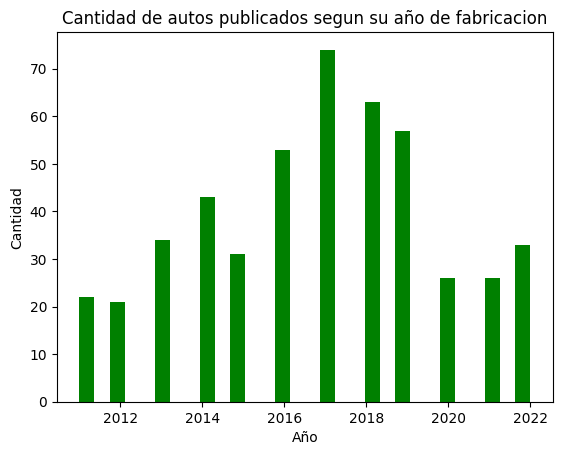

In [40]:
#Representacion de cantidad de autos segun su año de fabricacion
fig = plt.figure()
ax = plt.axes()
ax.hist(x=df_pesos.year, bins=30,color="green")
plt.title('Cantidad de autos publicados segun su año de fabricacion')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

La mayoria de los autos en ventan son grises y blancos.

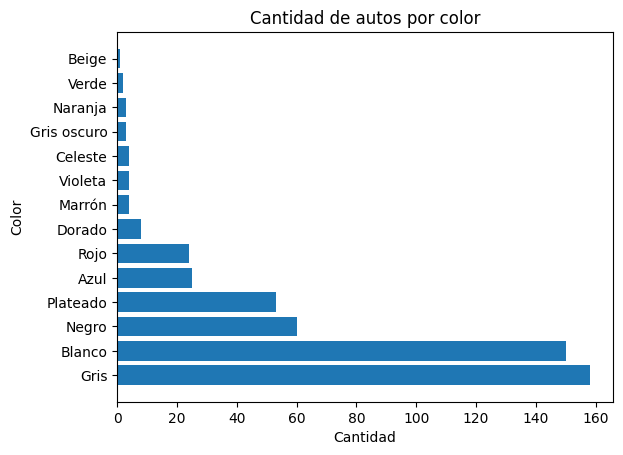

In [41]:
# Calcular la cantidad de veces que se repite cada color
colors = df['color'].value_counts()

plt.barh(colors.index, colors.values)

plt.xlabel('Cantidad')
plt.ylabel('Color')
plt.title('Cantidad de autos por color')

plt.show()

**Estadisticas de kilometros de autos publicado**s



Promedio de kilometros publicados 70000 km


<ipython-input-42-101c9606aa1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pesos.kilometres, bins=20)


count       510.000000
mean      74436.370588
std       46771.799272
min         500.000000
25%       43000.000000
50%       65750.000000
75%       99100.000000
max      335000.000000
Name: kilometres, dtype: float64

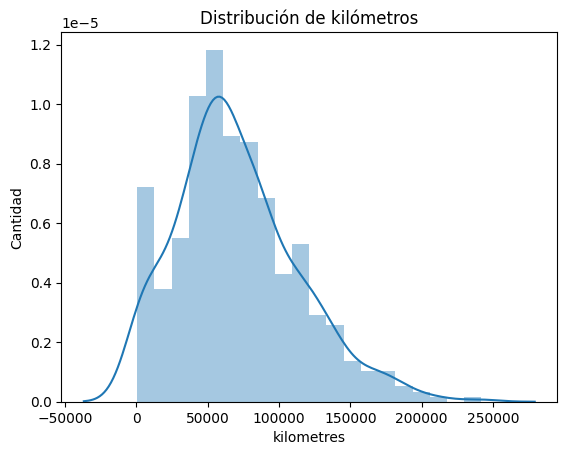

In [42]:
get_ipython().magic(u'matplotlib inline')
sns.distplot(df_pesos.kilometres, bins=20)
plt.title('Distribución de kilómetros')
plt.ylabel('Cantidad')
df.kilometres.describe()

Text(0.5, 1.0, 'Relacion precio-kilometros')

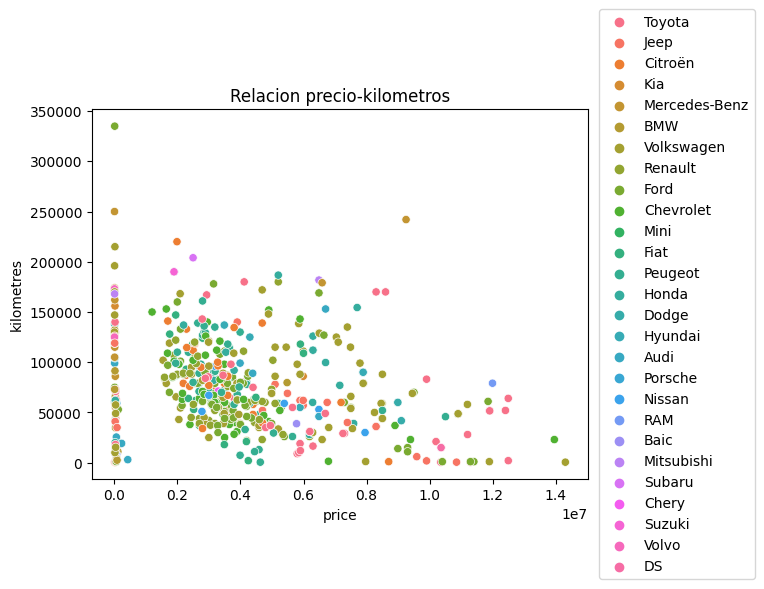

In [43]:
#Marcas mas publicadas y relacion entre kilometros
sns.scatterplot(x="price", y="kilometres", hue='brand',data=df)
plt.legend(loc='right', bbox_to_anchor=(1.35, 0.5), ncol=1)
plt.title('Relacion precio-kilometros')

In [44]:
# Cantidad de marcas en publicaciones
df_pesos.brand.nunique()


24

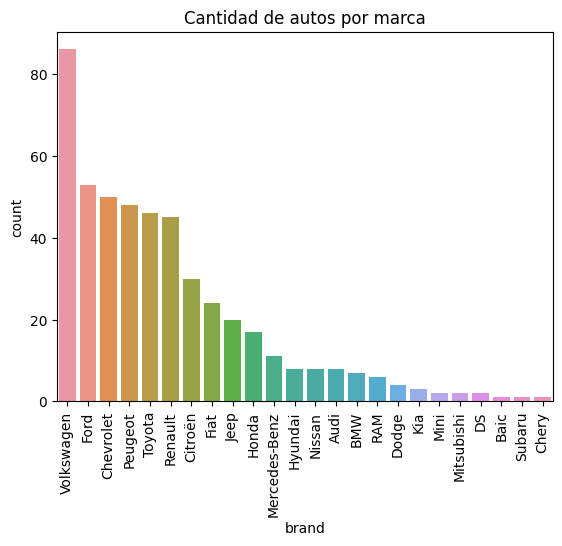

In [45]:
#Cantidad de autos por marcas
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='brand', data=df_pesos, order=df_pesos.brand.value_counts().index)
plt.xticks(rotation=90)
plt.title("Cantidad de autos por marca")
plt.show()

In [46]:
#Clasificasion segun los kilometros
bins = [0, 500, 40000, float('inf')]

# Crear una nueva columna con la clasificación de kilometraje
df_pesos['km_group'] = pd.cut(df_pesos['kilometres'], bins=bins, labels=['nuevo', 'poco uso', 'mucho uso'])

# Agrupar los datos por marca y clasificación de kilometraje
df_claskm = df_pesos.groupby(['brand', 'km_group']).size().reset_index(name='count')

df_claskm

<ipython-input-46-3f429e8852bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['km_group'] = pd.cut(df_pesos['kilometres'], bins=bins, labels=['nuevo', 'poco uso', 'mucho uso'])


,brand,km_group,count
0,Audi,nuevo,0
1,Audi,poco uso,3
2,Audi,mucho uso,5
3,BMW,nuevo,0
4,BMW,poco uso,6
...,...,...,...
67,Toyota,poco uso,19
68,Toyota,mucho uso,26
69,Volkswagen,nuevo,1
70,Volkswagen,poco uso,18


<ipython-input-47-c59a86cc3bca>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_claskm_pivot = df_claskm.pivot('brand', 'km_group', 'count')


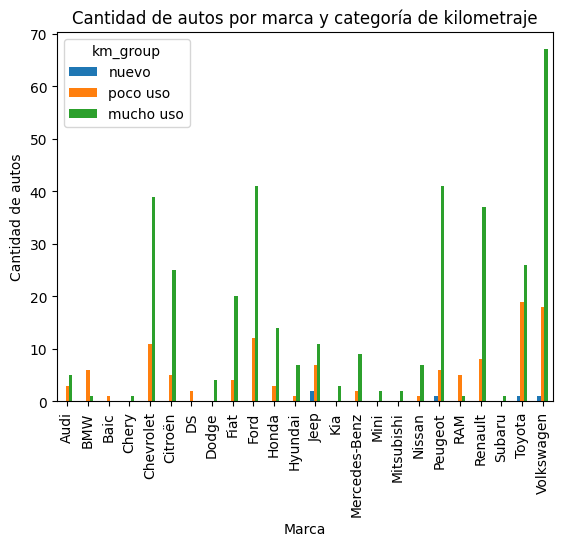

In [47]:
# Cantidad de autos por marca segun la clasificasion por km
df_claskm_pivot = df_claskm.pivot('brand', 'km_group', 'count')

ax = df_claskm_pivot.plot.bar()

ax.set_xlabel('Marca')
ax.set_ylabel('Cantidad de autos')
ax.set_title('Cantidad de autos por marca y categoría de kilometraje')

plt.show()

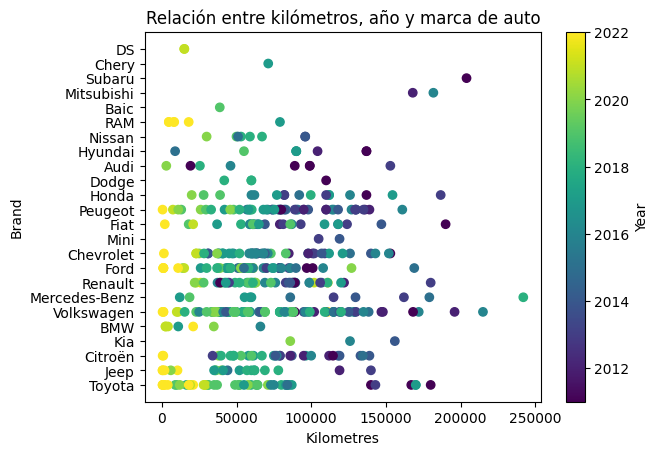

In [48]:
# Relacion entre kilometros, año de fabricacion y las marcas de los autos
df_km_year = df_pesos[['kilometres', 'brand', 'year']].dropna()

# Crear gráfico de dispersión
plt.scatter(df_km_year['kilometres'], df_km_year['brand'], c=df_km_year['year'], cmap='viridis')

plt.xlabel('Kilometres')
plt.ylabel('Brand')
plt.colorbar(label='Year')
plt.title('Relación entre kilómetros, año y marca de auto')

plt.show()

<ipython-input-49-302c662f46a6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_km = df.groupby('kilometres').mean()['price']


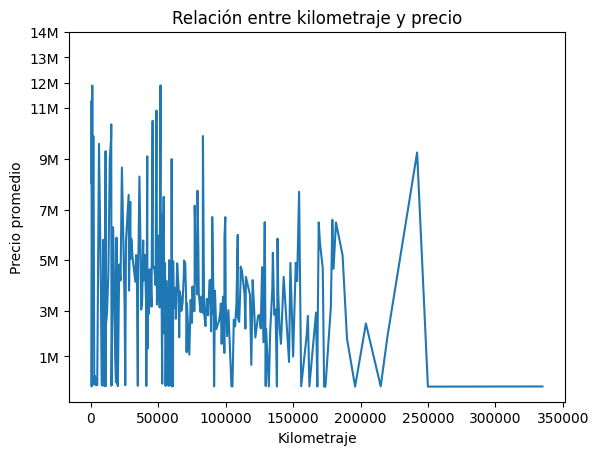

In [49]:
# Agrupar por kilometraje y calcular el precio promedio
df_km = df.groupby('kilometres').mean()['price']

plt.plot(df_km.index, df_km.values)
plt.xlabel('Kilometraje')
plt.ylabel('Precio promedio')
plt.title('Relación entre kilometraje y precio')
yticks = [1200000, 3000000, 5000000, 7000000, 9000000, 11000000, 12000000, 13000000, 14000000]
ylabels = ['1M', '3M', '5M', '7M', '9M', '11M', '12M', '13M', '14M']
plt.yticks(yticks, ylabels)
plt.show()

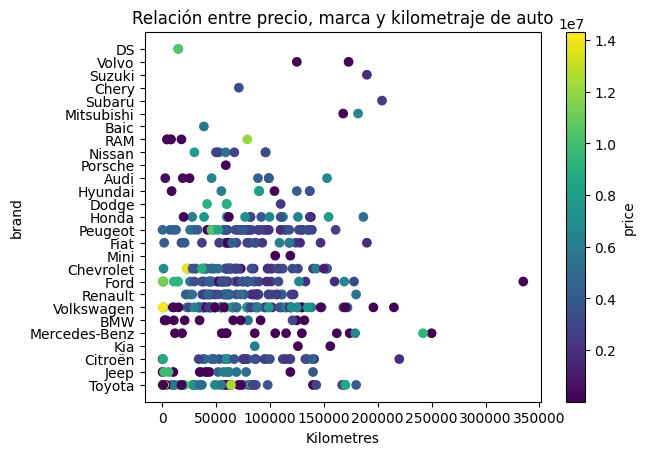

In [50]:
#Relación entre precio, marca y kilometraje de auto
plt.scatter(df['kilometres'], df['brand'], c=df['price'], cmap='viridis')

plt.xlabel('Kilometres')
plt.ylabel('brand')
plt.colorbar(label='price')
plt.title('Relación entre precio, marca y kilometraje de auto')

plt.show()

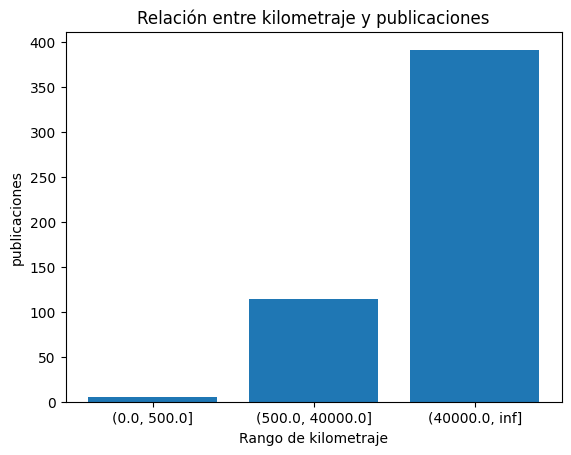

In [51]:
#Cantidad de autos segun la clasificasion de kl
df['km_group'] = pd.cut(df['kilometres'], bins)
df_km = df.groupby('km_group').count()['price']

plt.bar(df_km.index.astype(str), df_km.values)
plt.xlabel('Rango de kilometraje')
plt.ylabel('publicaciones')
plt.title('Relación entre kilometraje y publicaciones')
plt.show()

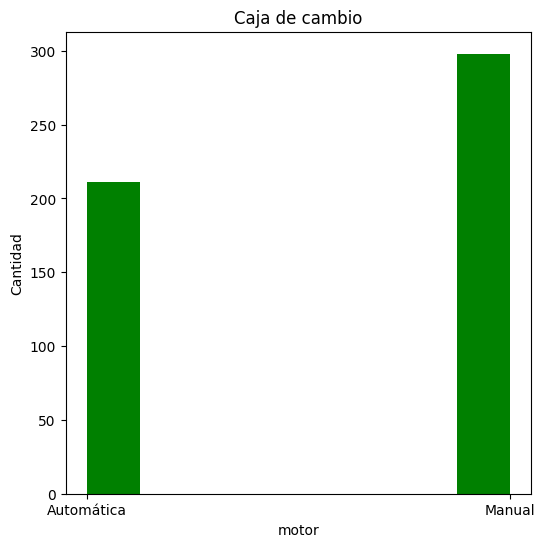

In [52]:
#filtrado segun el tipo de motor
df_filtrados = df[df['gear'].notna()]

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.hist(x=df_filtrados['gear'].astype(str), bins=8, color="green")
plt.title('Caja de cambio')
plt.xlabel('motor')
plt.ylabel('Cantidad')

plt.show()

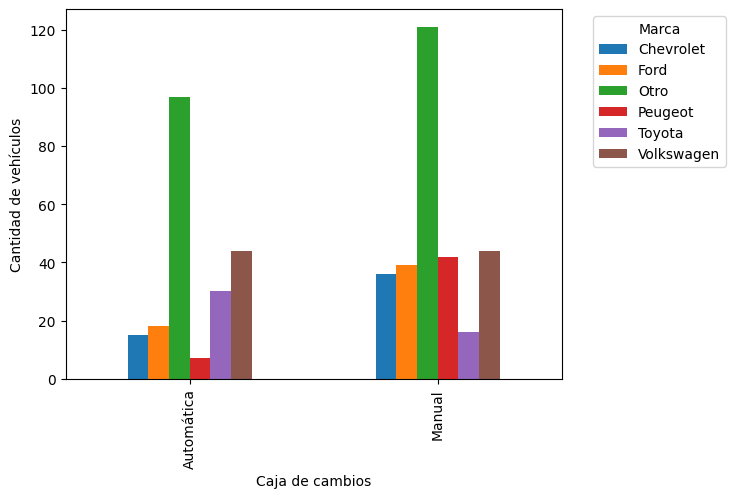

In [53]:
#Cantidad de autos por tipo de caja de cambio
# Seleccionar las 5 marcas más comunes
top_brands = df['brand'].value_counts().nlargest(5).index.tolist()

# Crear una columna con la marca "Otro" para las marcas que no son de interés
df.loc[~df['brand'].isin(top_brands), 'brand'] = 'Otro'

# Agrupar los datos por tipo de motor y marca y contar las ocurrencias
counts = df.groupby(['gear', 'brand'])['brand'].count().reset_index(name='count')

counts.pivot(index='gear', columns='brand', values='count').plot(kind='bar')

plt.xlabel('Caja de cambios')
plt.ylabel('Cantidad de vehículos')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

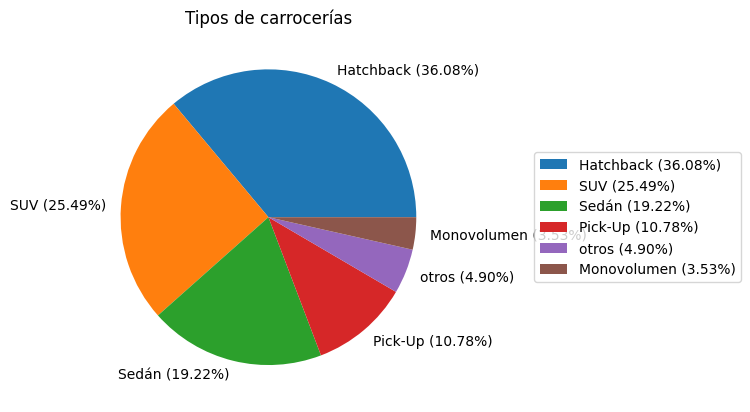

In [54]:
#Tipos de carrocerias
# Obtener las 5 categorías más comunes en body_type
top_body_types = df['body_type'].value_counts().nlargest(5).index.tolist()

# Reemplazar los valores que no están en el top 5 por "otros"
df['body_type'] = df['body_type'].where(df['body_type'].isin(top_body_types), other='otros')

# Contar la cantidad de ocurrencias por cada categoría
counts = df['body_type'].value_counts()

plt.pie(counts, labels=[f"{i} ({v/sum(counts)*100:.2f}%)" for i, v in counts.items()])

plt.legend(loc="center left", bbox_to_anchor=(1.2, 0.5))
plt.title('Tipos de carrocerías')
plt.show()

# Conclusiones

Lo que pudimos concluir es que la mayoria de las publicaciones son de autos usados, a  mayor kilometraje esto hace que su precio tienda a bajar. La marca que predomina en el mercado es Volkswagen, los autos mas publicados son de color blanco y gris y el promedio de año de fabricación es 2017. 
Los autos presentan un valor promedio de 4 millones de pesos argentinos  con 24 marcas en el mercado y el mayor porcentaje de autos publicado son autos compactos de caja de cambio manual.

In [55]:
print('Años mas frecuentes de fabricacion:',df_pesos.year.nunique())

Años mas frecuentes de fabricacion: 12


Autos publicados en dataset van desde 1995 a 2022.
Desde el 2011 en adelante predominan aquellos fabricados en 2017/2018


In [56]:
#Kilometros promedios, min y max de autos publicados
df.kilometres.describe()

count       510.000000
mean      74436.370588
std       46771.799272
min         500.000000
25%       43000.000000
50%       65750.000000
75%       99100.000000
max      335000.000000
Name: kilometres, dtype: float64

In [57]:
print('Valor max en pesos arg',df_pesos['price'].max())
print('Valor min en pesos arg',df_pesos['price'].min())
print('Valor promedio en pesos arg',round(df_pesos['price'].mean(),2))

Valor max en pesos arg 14299000
Valor min en pesos arg 8000
Valor promedio en pesos arg 4117121.68


Hay 24 marcas publicadas

In [58]:
print('se destacan marcas principales de venta:',df_pesos.brand.value_counts())

se destacan marcas principales de venta: Volkswagen       86
Ford             53
Chevrolet        50
Peugeot          48
Toyota           46
Renault          45
Citroën          30
Fiat             24
Jeep             20
Honda            17
Mercedes-Benz    11
Hyundai           8
Nissan            8
Audi              8
BMW               7
RAM               6
Dodge             4
Kia               3
Mini              2
Mitsubishi        2
DS                2
Baic              1
Subaru            1
Chery             1
Name: brand, dtype: int64


In [59]:
df_pesos.gear.value_counts()

Manual        278
Automática    204
Name: gear, dtype: int64

In [60]:
df_pesos.color.value_counts()

Gris           151
Blanco         148
Negro           56
Plateado        46
Rojo            23
Azul            23
Dorado           7
Marrón           4
Violeta          4
Gris oscuro      3
Naranja          3
Celeste          3
Verde            2
Beige            1
Name: color, dtype: int64